<a href="https://colab.research.google.com/github/veerababu-g/MobiusStrip/blob/main/Project_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Initializes the class with:

R: Radius from center to mid-strip
w: Strip width
n: Resolution
Calls _generate_mesh()
to build the geometry automatically.

In [ ]:
class MobiusStrip:
    def __init__(self, R=1.0, w=0.3, n=200):
        self.R = R
        self.w = w
        self.n = n
        self.x = None
        self.y = None
        self.z = None
        self.u = None
        self.v = None

        self._generate_mesh()

Uses the parametric equations to generate a 3D mesh of (x, y, z) points by:
Creating a grid of u and v values
Applying the Mobius strip formula for x(u,v), y(u,v), and z(u,v)

In [ ]:
    def _generate_mesh(self):
        u = np.linspace(0, 2 * np.pi, self.n)
        v = np.linspace(-self.w / 2, self.w / 2, self.n)
        self.u, self.v = np.meshgrid(u, v)

        self.x = (self.R + self.v * np.cos(self.u / 2)) * np.cos(self.u)
        self.y = (self.R + self.v * np.cos(self.u / 2)) * np.sin(self.u)
        self.z = self.v * np.sin(self.u / 2)

Numerically estimates surface area using:
Partial derivatives ∂r/∂u and ∂r/∂v
Cross product magnitude as local surface element
Summation over the grid (approximate integration)

In [ ]:
    def surface_area(self):
        du = 2 * np.pi / (self.n - 1)
        dv = self.w / (self.n - 1)

        xu = -np.sin(self.u) * (self.R + self.v * np.cos(self.u / 2)) \
             - self.v * np.sin(self.u / 2) * np.cos(self.u) / 2
        yu = np.cos(self.u) * (self.R + self.v * np.cos(self.u / 2)) \
             - self.v * np.sin(self.u / 2) * np.sin(self.u) / 2
        zu = self.v * np.cos(self.u / 2) / 2

        xv = np.cos(self.u / 2) * np.cos(self.u)
        yv = np.cos(self.u / 2) * np.sin(self.u)
        zv = np.sin(self.u / 2)

        # Cross product magnitude
        dA = np.sqrt(
            (yu * zv - zu * yv)**2 +
            (zu * xv - xu * zv)**2 +
            (xu * yv - yu * xv)**2
        )
        return np.sum(dA) * du * dv

Computes the total length of both edges by:
Tracing the boundary at v = ±w/2
Using np.linalg.norm on consecutive 3D points
Doubling the result to include both edges

In [ ]:
    def edge_length(self):
        u = np.linspace(0, 2 * np.pi, self.n)
        v = self.w / 2

        x_edge = (self.R + v * np.cos(u / 2)) * np.cos(u)
        y_edge = (self.R + v * np.cos(u / 2)) * np.sin(u)
        z_edge = v * np.sin(u / 2)

        pts = np.stack([x_edge, y_edge, z_edge], axis=1)
        dists = np.linalg.norm(np.diff(pts, axis=0), axis=1)
        return np.sum(dists)

Visualizes the strip using matplotlib’s 3D plotting capabilities, showing the geometry in an intuitive way.



In [ ]:
      def plot(self):
        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(self.x, self.y, self.z, color='lightblue', edgecolor='k', linewidth=0.2)
        ax.set_title("Mobius Strip")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
        plt.tight_layout()
        plt.show()

In [ ]:
strip = MobiusStrip(R=1.0, w=0.3, n=300)
print(f"Surface Area ≈ {strip.surface_area():.5f}")
print(f"Edge Length ≈ {strip.edge_length():.5f}")
strip.plot()

 3D plot output of the Mobius strip

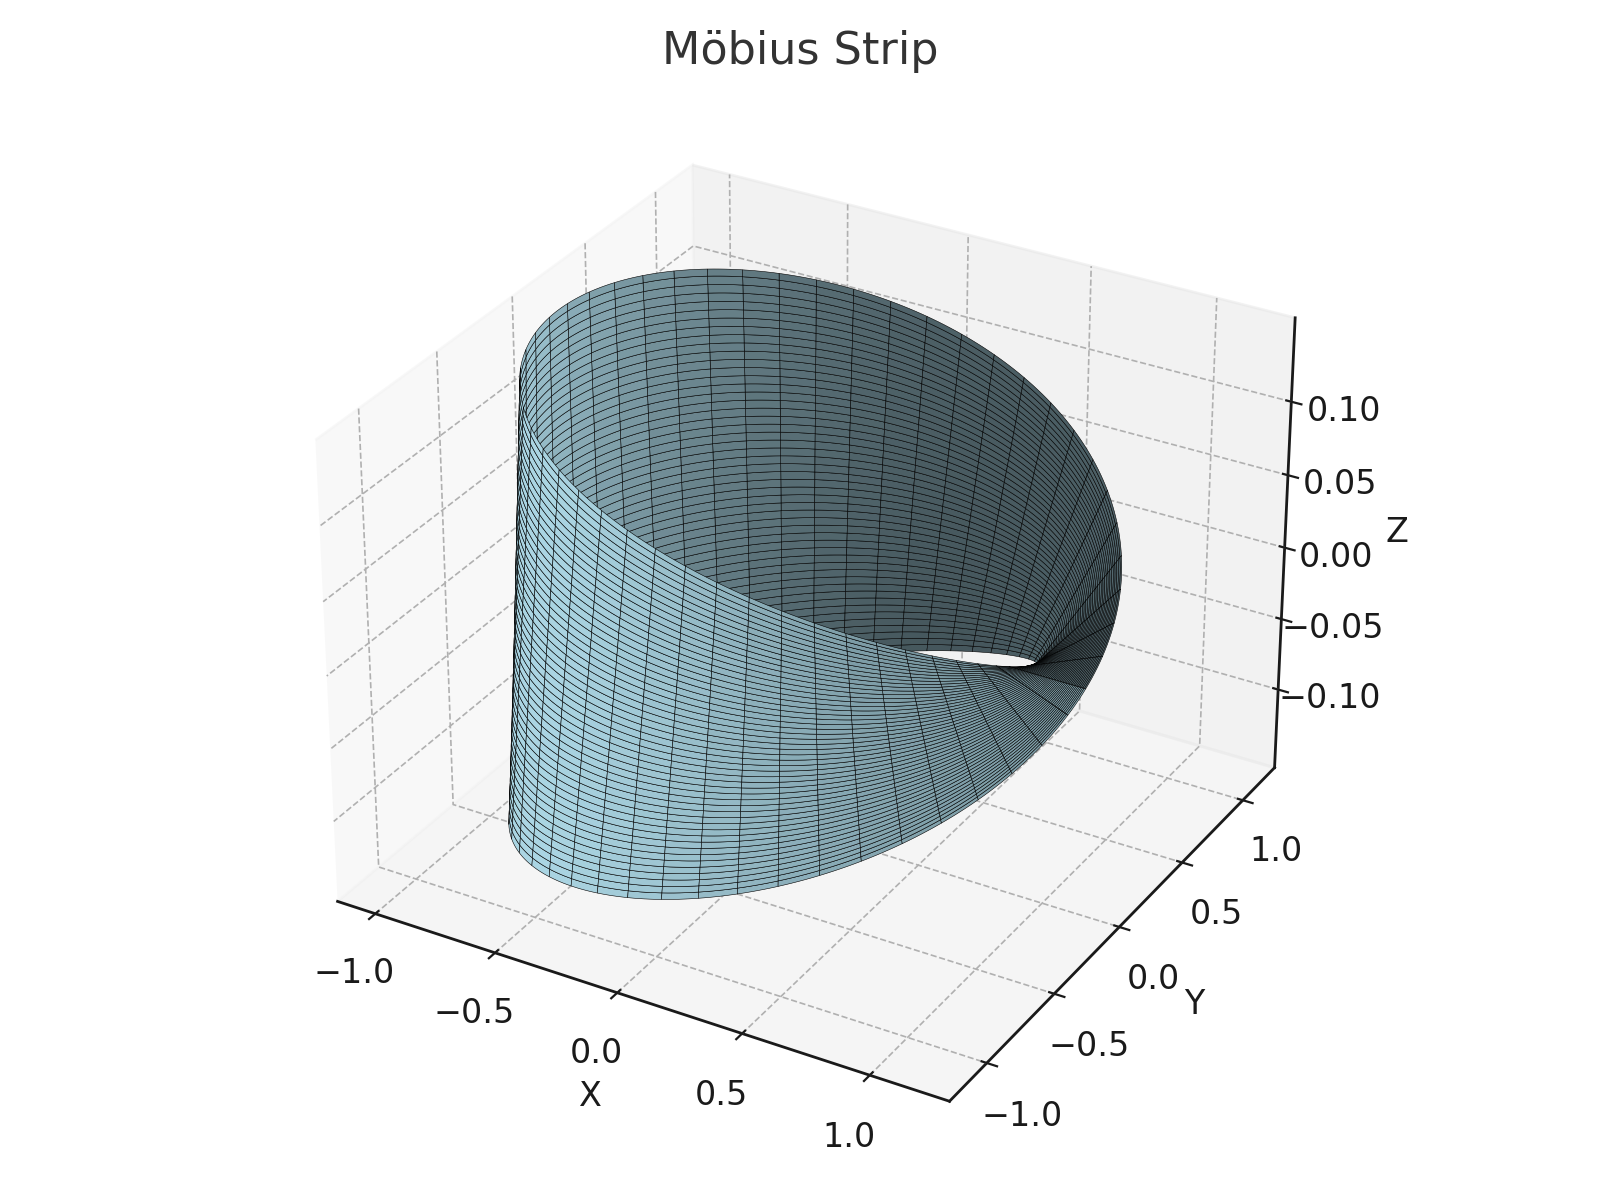 plot output of the Möbius strip